# Quinto Examen

## Codea UNI

### Richard Soriano Ricalde

Imagina que trabajas en la industria minera, específicamente en la mina de Las Gangas. Te han proporcionado un conjunto de datos que incluye información sobre el tiempo de frenado y distancia de una perforadora respecto a un obstáculo. Haz un algoritmo de K-means y DB-scan para hallar posibles patrones y define si se genera un numero de clusters o si es distinto el por qué de esto. Comenta tus resultados desde un punto de vista operativo.


In [28]:
#LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [8]:
#LECTURA DE DATOS
data = pd.read_csv('datos_camiones_simulados.csv')
data.head()

,Distancia,Tiempo
0,3.738935,17.579609
1,2.859935,21.681321
2,3.324911,18.726685
3,5.129791,19.328867
4,4.287700,17.586732


In [10]:
data.describe()

,Distancia,Tiempo
count,3000.000000,3000.000000
mean,5.334985,18.280892
std,3.783963,10.464562
min,-2.724341,-1.352057
25%,1.742535,6.317163
50%,5.010342,19.887052
75%,9.249269,28.585776
max,13.006870,36.061798


In [17]:
data = data.rename(columns={'Distancia': 'DISTANCIA', 'Tiempo': 'TIEMPO'})

In [34]:
print(data.groupby('DISTANCIA').size())

DISTANCIA
0.020876     1
0.025333     1
0.028841     1
0.030008     1
0.038261     1
            ..
12.503842    1
12.798151    1
12.822594    1
12.923538    1
13.006870    1
Length: 2839, dtype: int64


In [41]:
# Ya que no pueden haber distancas ni tiempos negativas se eliminan dichos datos del df.
data = data[data['DISTANCIA'] >= 0]
data = data[data['TIEMPO'] >= 0]

In [42]:
print(data.groupby('DISTANCIA').size())


DISTANCIA
0.020876     1
0.025333     1
0.028841     1
0.038261     1
0.040951     1
            ..
12.503842    1
12.798151    1
12.822594    1
12.923538    1
13.006870    1
Length: 2833, dtype: int64


In [44]:
X = np.array(data[["DISTANCIA"]])
y = np.array(data['TIEMPO'])
X.shape

(2833, 1)

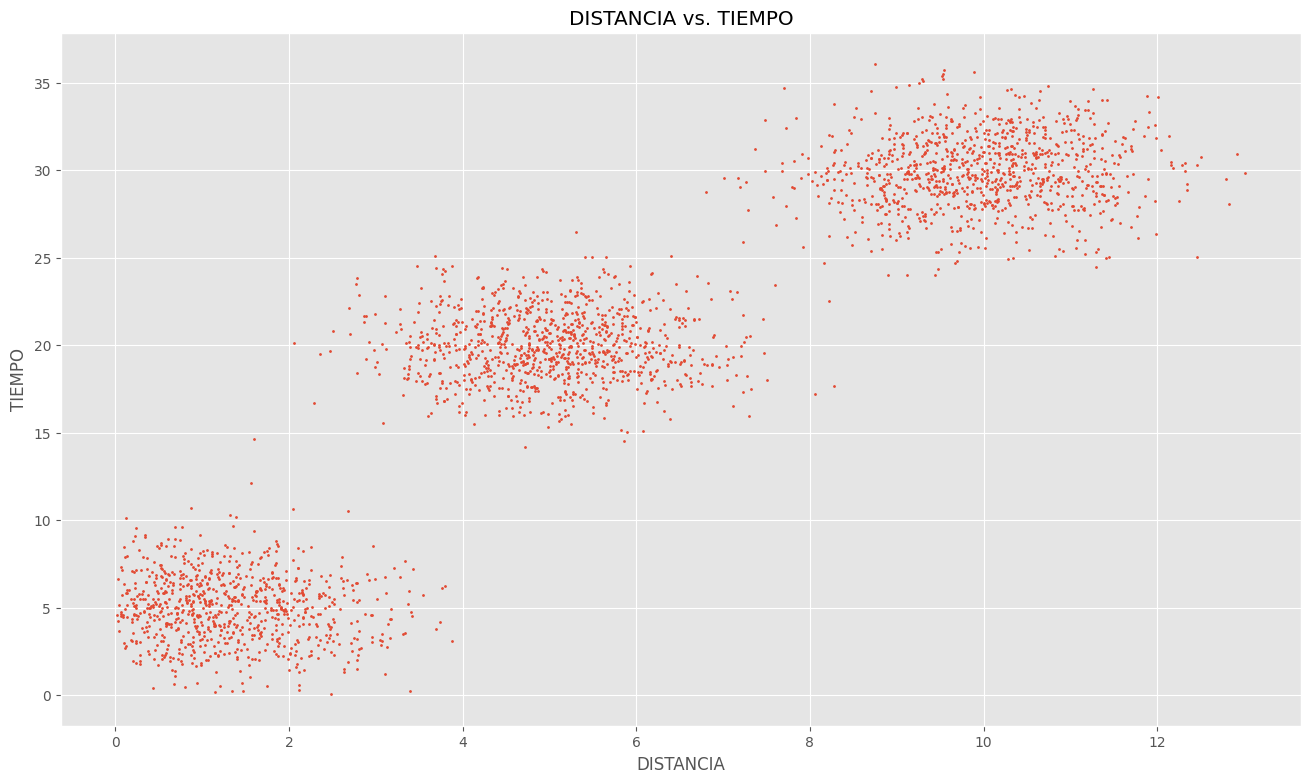

In [45]:
x = data['DISTANCIA'].values
y = data['TIEMPO'].values
plt.xlabel('DISTANCIA')
plt.ylabel('TIEMPO')
plt.title('DISTANCIA vs. TIEMPO')
plt.plot(x,y,'o',markersize=1)

## K - means

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

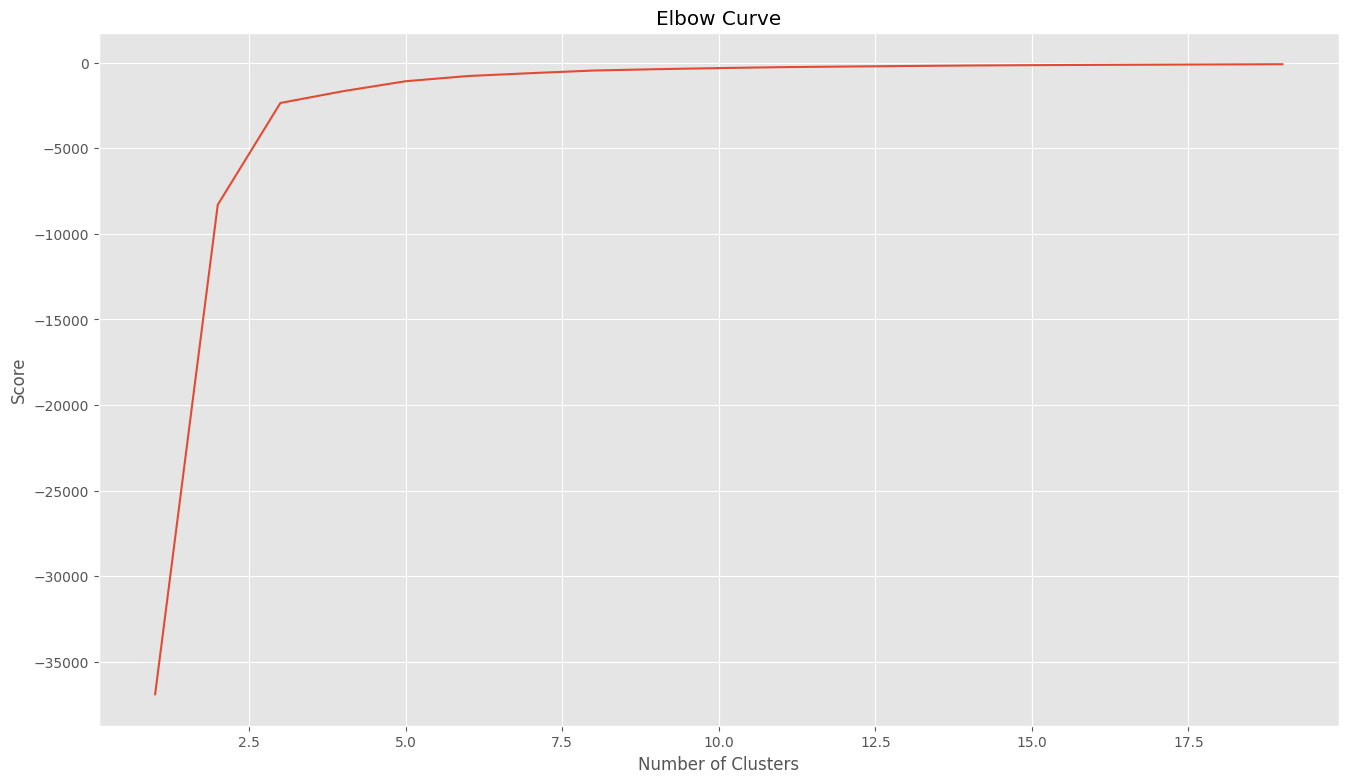

In [110]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [107]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.34382423e+00  5.00219651e+00  1.02040816e+00 -1.11022302e-15
   9.97599040e-01  4.96518607e+00]
 [ 9.96370071e+00  2.99408511e+01  1.80722892e-02  1.99799197e+00
   1.99397590e+00  6.90562249e+00]
 [ 5.02184396e+00  1.99878102e+01  1.95916335e+00  1.00000000e+00
   2.98804781e-03  5.17928287e-02]]


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
data['Cluster'] = kmeans.labels_

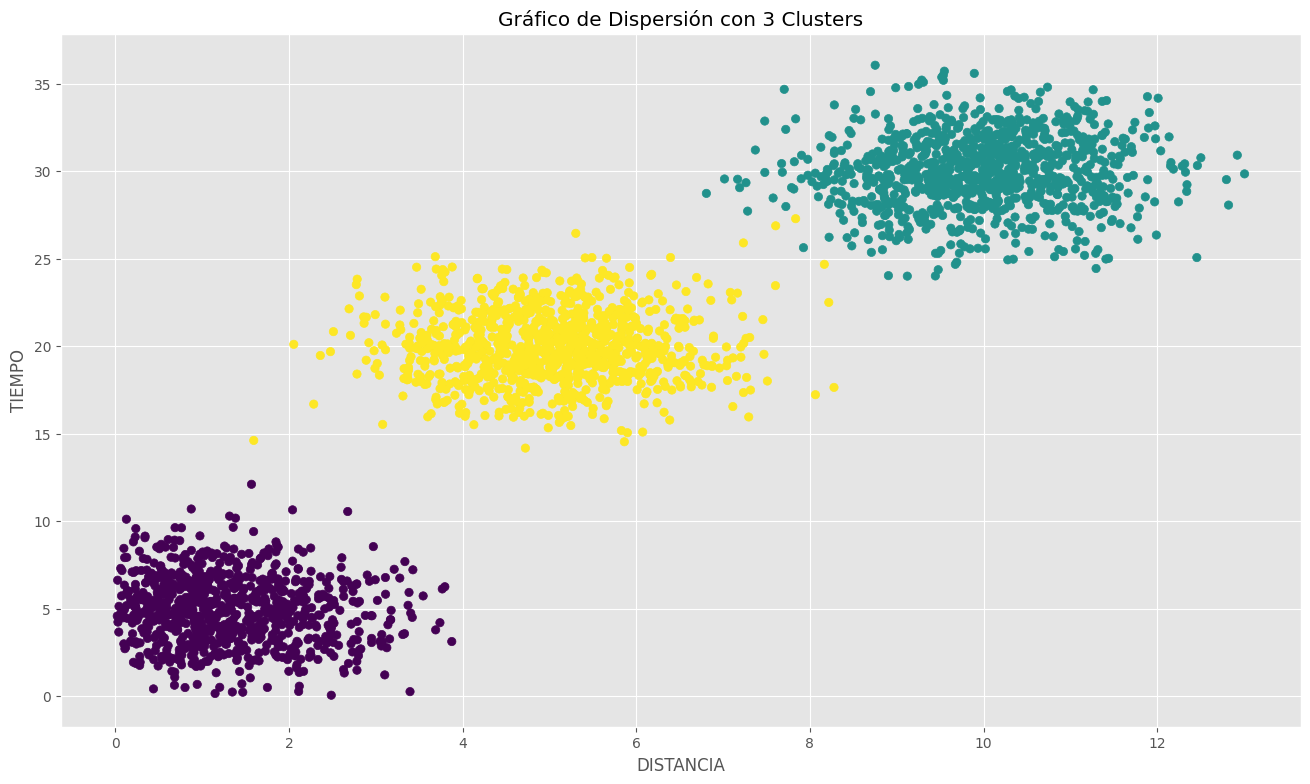

In [109]:
plt.scatter(data['DISTANCIA'], data['TIEMPO'], c=data['Cluster'], cmap='viridis')
plt.xlabel('DISTANCIA')
plt.ylabel('TIEMPO')
plt.title('Gráfico de Dispersión con 3 Clusters')
plt.show()


## DBSCAN

In [60]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [113]:
# Crea un objeto DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=3)  # Puedes ajustar eps y min_samples según tu caso

In [114]:
# Ajusta el modelo a tus datos y obtén las etiquetas de cluster
labels = dbscan.fit_predict(data_scaled)

In [115]:
data['cluster'] = labels

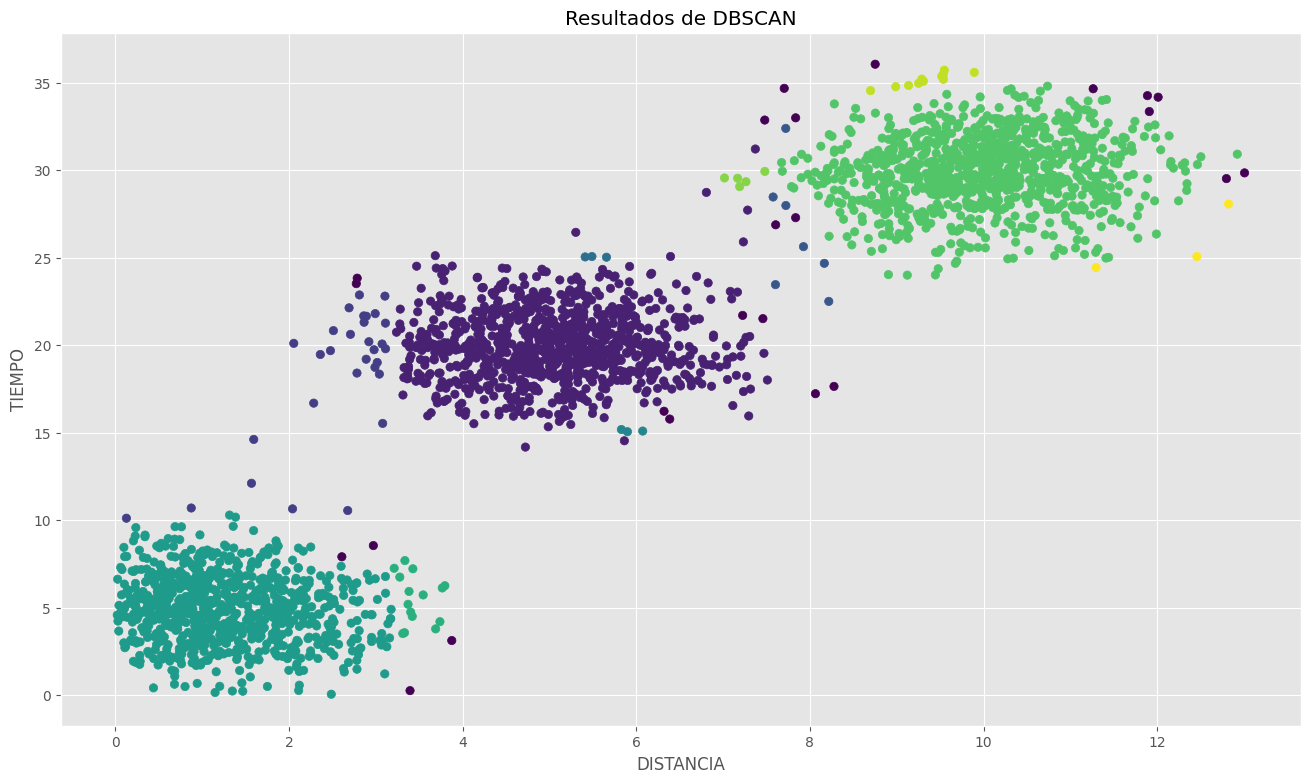

In [116]:
plt.scatter(data['DISTANCIA'], data['TIEMPO'], c=data['cluster'], cmap='viridis')
plt.xlabel('DISTANCIA')
plt.ylabel('TIEMPO')
plt.title('Resultados de DBSCAN')
plt.show()

In [117]:
from sklearn import metrics

print('Comparando metodologías:','\n')
print('Silueta kmeans: ' + str(metrics.silhouette_score(data, cluster, metric='cosine')))
print('Silueta DBSCAN: ' + str(metrics.silhouette_score(data, labels, metric='cosine')))

Comparando metodologías: 

Silueta kmeans: 0.8270430358422162
Silueta DBSCAN: 0.358039440660411


Para seleccionar el mejor método de segmentación se utilizó el criterio de silueta, siendo el algoritmo kmeans el más apropiado con un indicador de silueta más próximo a uno.

Operativamente podemos concluir que existen 3 grupos de datos que corresponden a una distancia adecuada, una distancia media  y una distancia corta para el frenado de la perforadora al obstaculo, se debe considerar los tiempos de reacción en la distancia más corta y basarnos en estos para mejorar los sitemas anticolisión y evitar fututos accidentes.